# Exploring Dandiset 001354: Hippocampal neuronal responses to PAGER activation

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This notebook explores Dandiset [001354](https://dandiarchive.org/dandiset/001354/0.250312.0036), titled "Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation".

**Description from DANDI Archive:**
*This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors. Recorded neurons were transfected with an AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were then recorded in response to DCZ (100 nM) or DCZ + soluble mCherry (1 uM) application.*

This notebook will cover:
* Listing required Python packages.
* Connecting to the DANDI archive and loading the Dandiset metadata.
* Listing assets within the Dandiset.
* Loading a specific NWB (Neurodata Without Borders) file from the Dandiset.
* Exploring some basic metadata of the NWB file.
* Visualizing a current clamp recording and its corresponding stimulus from the NWB file.
* Summarizing findings and suggesting potential future directions.

## Required Packages

To run this notebook, you will need the following Python packages installed:
* `dandi` (for interacting with the DANDI Archive)
* `pynwb` (for working with NWB files)
* `h5py` (a dependency for pynwb, for HDF5 file access)
* `remfile` (for streaming remote files)
* `matplotlib` (for plotting)
* `numpy` (for numerical operations)
* `seaborn` (for plot styling)

It is assumed that these packages are already installed on your system.

## Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001354"
dandiset_version = "0.250312.0036"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'N/A')}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036
Dandiset description: This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors. Recorded neurons were transfected with an AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were then recorded in response to DCZ (100 nM) or DCZ + soluble mCherry (1 uM) application.

The authors are grateful to the St Jude Children’s Research Hospital Collaborative Research Consortium on GPCRs, the Chan Zuckerberg Biohub–San Francisco, Phil and Penny Knight Initiative for Brain Resilience (KIG-104), Stanford Cancer Institute, Wu Tsai Neurosciences Institute of Stanford University and the NIH (MH135934 to A.Y.T. and I.S., F32CA257159 to N.A.K., NS121106 to I.S.) for funding th

## Loading an NWB File

We will now load one of the NWB files from the Dandiset to explore its contents.

The NWB file we will load is: `sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb`
Its asset ID is `8609ffee-a79e-498c-8dfa-da46cffef135`.

The URL for downloading this asset can be constructed using its asset ID:
`https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/`

You can explore this NWB file interactively on Neurosift using the following link:
[View on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=0.250312.0036)

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# URL of the NWB file asset
nwb_asset_id = "8609ffee-a79e-498c-8dfa-da46cffef135"
nwb_file_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"

print(f"Loading NWB file from: {nwb_file_url}")

# Load the NWB file using remfile for streaming
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file, mode='r')
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

print("\nNWB file loaded successfully.")
print(f"Identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully.
Identifier: pk2024_07_17_0001
Session description: Intracellular electrophysiology experiment.
Session start time: 2024-07-17 15:08:30-07:00


## Exploring NWB File Metadata and Structure

The loaded `nwb` object contains various pieces of metadata and experimental data. Let's list some of the available groups.
The `nwb-file-info` tool provided extensive information on the file structure. Key groups include:
* `nwb.acquisition`: Contains acquired data, such as current clamp responses.
* `nwb.stimulus`: Contains stimulus data applied during experiments.
* `nwb.icephys_electrodes`: Information about the intracellular electrodes used.
* `nwb.subject`: Information about the experimental subject.
* `nwb.icephys_simultaneous_recordings` and `nwb.icephys_sequential_recordings`: Tables organizing the recordings.

We can list the names of time series available in the acquisition group:

In [3]:
print("First 10 TimeSeries in nwb.acquisition (if available):")
for i, series_name in enumerate(nwb.acquisition):
    if i >= 10:
        break
    print(f"- {series_name}")
if len(nwb.acquisition) > 10:
    print("... and more.")

print("\nFirst 10 TimeSeries in nwb.stimulus (if available):")
for i, series_name in enumerate(nwb.stimulus):
    if i >= 10:
        break
    print(f"- {series_name}")
if len(nwb.stimulus) > 10:
    print("... and more.")

First 10 TimeSeries in nwb.acquisition (if available):
- current_clamp-response-01-ch-0
- current_clamp-response-01-ch-1
- current_clamp-response-02-ch-0
- current_clamp-response-02-ch-1
- current_clamp-response-03-ch-0
- current_clamp-response-03-ch-1
- current_clamp-response-04-ch-0
- current_clamp-response-04-ch-1
- current_clamp-response-05-ch-0
- current_clamp-response-05-ch-1
... and more.

First 10 TimeSeries in nwb.stimulus (if available):
- stimulus-01-ch-0
- stimulus-01-ch-1
- stimulus-02-ch-0
- stimulus-02-ch-1
- stimulus-03-ch-0
- stimulus-03-ch-1
- stimulus-04-ch-0
- stimulus-04-ch-1
- stimulus-05-ch-0
- stimulus-05-ch-1
... and more.


## Visualizing Electrophysiology Data

Let's visualize one of the current clamp responses and its corresponding stimulus. We will use `current_clamp-response-01-ch-0` from `nwb.acquisition` and `stimulus-01-ch-0` from `nwb.stimulus`.
The output of `tools_cli.py nwb-file-info` shows that these series contain data recorded at 20,000 Hz. We'll plot a short segment (e.g., 0.2 seconds) to see the details.

Selected response series: current_clamp-response-01-ch-0, Description: Response to: ramp
Selected stimulus series: stimulus-01-ch-0, Description: Stim type: ramp


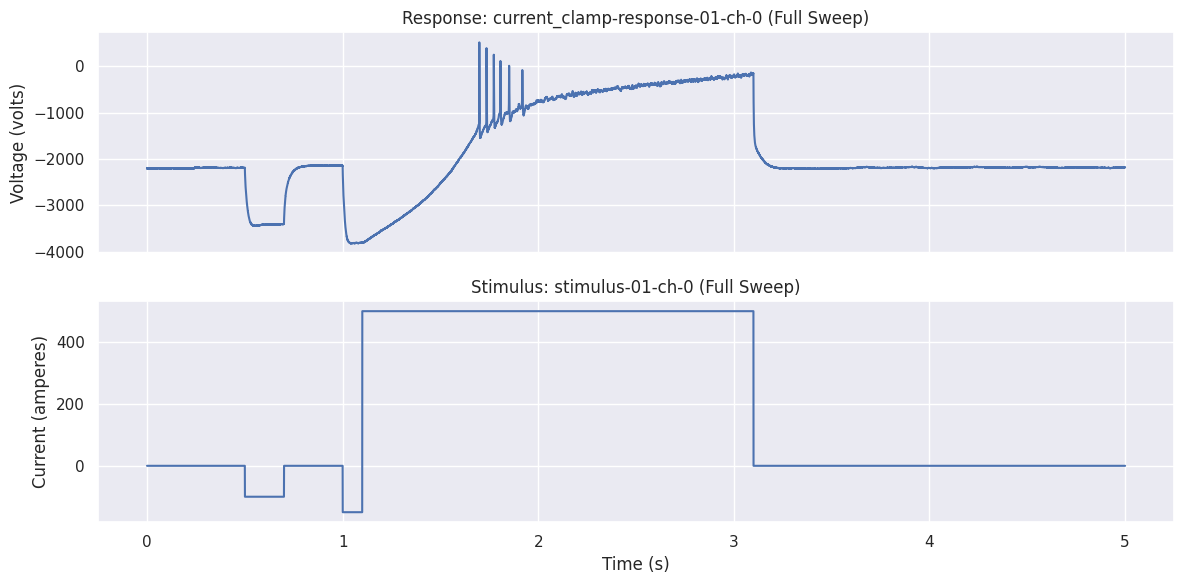

In [4]:
# Select the specific response and stimulus series
response_series_name = "current_clamp-response-01-ch-0"
stimulus_series_name = "stimulus-01-ch-0"

response_series = nwb.acquisition[response_series_name]
stimulus_series = nwb.stimulus[stimulus_series_name]

print(f"Selected response series: {response_series_name}, Description: {response_series.description}")
print(f"Selected stimulus series: {stimulus_series_name}, Description: {stimulus_series.description}")

# Get full data for the selected series
response_data_full = response_series.data[:]
stimulus_data_full = stimulus_series.data[:]
sampling_rate_hz = response_series.rate

# Create timestamps for the full series
# Timestamps should start from the series' starting_time
response_timestamps_full = np.arange(len(response_data_full)) / sampling_rate_hz + response_series.starting_time
stimulus_timestamps_full = np.arange(len(stimulus_data_full)) / sampling_rate_hz + stimulus_series.starting_time


# Create plot
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

# Plot response
axes[0].plot(response_timestamps_full, response_data_full)
axes[0].set_title(f"Response: {response_series.name} (Full Sweep)")
axes[0].set_ylabel(f"Voltage ({response_series.unit})")

# Plot stimulus
axes[1].plot(stimulus_timestamps_full, stimulus_data_full)
axes[1].set_title(f"Stimulus: {stimulus_series.name} (Full Sweep)")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel(f"Current ({stimulus_series.unit})")

plt.tight_layout()
plt.show()

The plot above shows the full voltage response of the neuron (top panel) to a current stimulus (bottom panel) for the selected sweep.
In this particular sweep, a negative current pulse results in a hyperpolarization of the cell membrane, characteristic of a passive response.

## Subject Information
Let's display some information about the experimental subject.

In [5]:
if nwb.subject:
    print(f"Subject ID: {nwb.subject.subject_id}")
    if hasattr(nwb.subject, 'age') and nwb.subject.age:
         print(f"Age: {nwb.subject.age}")
    else:
        print(f"Age: Not specified or N/A (age__reference: {getattr(nwb.subject, 'age__reference', 'N/A')})") # age may not be directly available
    print(f"Sex: {nwb.subject.sex}")
    print(f"Species: {nwb.subject.species}")
    if nwb.subject.date_of_birth:
        print(f"Date of Birth: {nwb.subject.date_of_birth.strftime('%Y-%m-%d')}")
else:
    print("No subject information available.")

Subject ID: PK-109
Age: Not specified or N/A (age__reference: birth)
Sex: F
Species: Mus musculus
Date of Birth: 2024-04-07


## Electrode Information
Information about the recording electrodes can also be useful.

In [6]:
print("Icephys Electrodes:")
if nwb.icephys_electrodes:
    for electrode_name, electrode in nwb.icephys_electrodes.items():
        print(f"- Name: {electrode_name}")
        print(f"  Description: {electrode.description}")
        if electrode.device:
            print(f"  Device: {electrode.device.name}, Description: {electrode.device.description}")
        # Limiting to the first electrode for brevity in output, but showing structure
        break 
else:
    print("No icephys electrode information available.")

Icephys Electrodes:
- Name: electrode-0
  Description: no description
  Device: DeviceIcephys, Description: no description


## Summary and Future Directions

This notebook demonstrated how to:
* Connect to the DANDI Archive and retrieve information about a Dandiset.
* Load a specific NWB file containing intracellular electrophysiology data.
* Access basic metadata and identify data series within the NWB file.
* Visualize a current clamp recording alongside its corresponding stimulus.

**Future Directions:**
* **Explore other sweeps:** The NWB file contains numerous sweeps (e.g., `current_clamp-response-02-ch-0`, `stimulus-02-ch-0`, etc.). Analyzing these could reveal responses to different stimulus patterns or intensities, potentially including action potentials.
* **Analyze stimulus-response properties:** For sweeps that elicit action potentials, one could analyze spike timing, firing rates, or input-output curves. For subthreshold responses, passive membrane properties like input resistance or time constant could be estimated.
* **Compare responses across conditions:** The Dandiset description mentions experiments with DCZ and DCZ + soluble mCherry. Comparing neuronal responses under these different conditions is a key goal of the original study. This would involve loading and analyzing NWB files corresponding to these different experimental manipulations.
* **Integrate with other metadata:** The NWB file also contains information about the subject (e.g., age, sex, species) and experimental setup (e.g., electrode information). This metadata can provide important context for interpreting the electrophysiological findings.
* **Utilize `icephys_sequential_recordings` and `icephys_simultaneous_recordings` tables:** These tables provide a structured way to access and iterate through related sets of recordings, which can be useful for systematic analysis of experimental protocols.

Remember to close the HDF5 file object if you are done with it, although in a notebook context it's often left open until the kernel is shut down.

In [7]:
# It's good practice to close the file when done,
# though in interactive sessions, this might be deferred.
# io.close() # This was already in the exploration script, ensure it's here if standalone cell needed
print("Exploration complete. You can close the NWB file using io.close() if needed.")

Exploration complete. You can close the NWB file using io.close() if needed.
